# PHÂN TÍCH KHÁM PHÁ DỮ LIỆU IONOSPHERE

## 1. Định nghĩa vấn đề (Define problem)
- Nguồn gốc: Bộ dữ liệu này được thu thập bởi một radar ở Goose Bay, Labrador. Radar này gửi các xung điện từ vào tầng điện ly và thu lại các tín hiệu phản xạ.
+ Mục đích: Mục tiêu là phân loại các tín hiệu radar phản xạ từ tầng điện ly thành hai loại: “good” (có thể sử dụng để phân tích) và “bad” (không thể sử dụng).
+ Đặc điểm: Bộ dữ liệu bao gồm 351 mẫu, mỗi mẫu có 34 thuộc tính số học mô tả các đặc điểm của tín hiệu radar. Mỗi cặp thuộc tính (giá trị thực và ảo) mô tả một đặc điểm cụ thể của tín hiệu radar tại một thời điểm nhất định.


## 2. Chuẩn bị vấn đề (Prepare Problem)
### 2.1. Khai báo thư viện (Load Libraries)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

### 2.2. Nạp dữ liệu (Load Dataset)

In [15]:
df = pd.read_csv('../data/ionosphere.csv', header = None)

In [16]:
column_names = [f'attr{i+1}' for i in range(34)] +['class']
df.columns = column_names

df['class'] = df['class'].map({'g': 1, 'b': 0})

## 3. Phân tích khám phá dữ liệu (Exploration Analyze Data - EDA)

### 3.1. Thống kê mô tả (Descriptive Statistics)  - Ungraphic Approach

#### (1). Hiển thị một số thông tin về dữ liệu
- Số dòng, số cột của dữ liệu
- Kiểu dữ liệu của từng cột
- 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
- Thông tin chung về dữ liệu

In [5]:
df.shape

(351, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   attr1   351 non-null    int64  
 1   attr2   351 non-null    int64  
 2   attr3   351 non-null    float64
 3   attr4   351 non-null    float64
 4   attr5   351 non-null    float64
 5   attr6   351 non-null    float64
 6   attr7   351 non-null    float64
 7   attr8   351 non-null    float64
 8   attr9   351 non-null    float64
 9   attr10  351 non-null    float64
 10  attr11  351 non-null    float64
 11  attr12  351 non-null    float64
 12  attr13  351 non-null    float64
 13  attr14  351 non-null    float64
 14  attr15  351 non-null    float64
 15  attr16  351 non-null    float64
 16  attr17  351 non-null    float64
 17  attr18  351 non-null    float64
 18  attr19  351 non-null    float64
 19  attr20  351 non-null    float64
 20  attr21  351 non-null    float64
 21  attr22  351 non-null    float64
 22  at

In [17]:

df.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr33,attr34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [18]:
df.tail()


,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr33,attr34,class
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1
350,1,0,0.84710,0.13533,0.73638,-0.06151,0.87873,0.08260,0.88928,-0.09139,0.78735,0.06678,0.80668,-0.00351,0.79262,-0.01054,0.85764,-0.04569,0.87170,-0.03515,0.81722,-0.09490,0.71002,0.04394,0.86467,-0.15114,0.81147,-0.04822,0.78207,-0.00703,0.75747,-0.06678,0.85764,-0.06151,1


##### Nhận xét
- Dữ liệu có 34 đặc trưng để phân lớp
- Giá trị của 4 đặc trưng có cùng đơn vị đo
- Tổng số dữ liệu là 351
- Dữ liệu phân lớp ở cột class

#### (2) Kiểm tra tính toàn vẹn của dữ liệu
- Dữ liệu có bị trùng lặp không? Hiện thị dòng bị vi phạm.
- Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
- Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm 

In [12]:
has_null = df.isnull().sum().any()
has_nan  = df.isna().sum().any()
n_duplicated = df.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df[df.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df[df.isna().any(axis=1)])


Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False


In [11]:
n_duplicated = df.duplicated(keep=False).sum()
print(f'+ Số dòng trùng: {n_duplicated}')
display(df[df.duplicated(keep=False)])
if n_duplicated > 0:
    print("+ Số dòng loại bỏ: %d" % len(df[df.duplicated(keep="first")]))


+ Số dòng trùng: 2


,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr33,attr34,class
102,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
248,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


+ Số dòng loại bỏ: 1


##### Nhận xét
- Dữ liệu không có giá trị bị thiếu (NaN, Null) 
- Dữ liệu có 2 dòng trùng ở vị trí 102 và 248

#### (3) Các tính chất thống kê trên dữ liệu 

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
attr1,351.0,0.891738,0.311155,0.0,1.000000,1.00000,1.000000,1.0
attr2,351.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0
attr3,351.0,0.641342,0.497708,-1.0,0.472135,0.87111,1.000000,1.0
attr4,351.0,0.044372,0.441435,-1.0,-0.064735,0.01631,0.194185,1.0
attr5,351.0,0.601068,0.519862,-1.0,0.412660,0.80920,1.000000,1.0
attr6,351.0,0.115889,0.460810,-1.0,-0.024795,0.02280,0.334655,1.0
attr7,351.0,0.550095,0.492654,-1.0,0.211310,0.72873,0.969240,1.0
attr8,351.0,0.119360,0.520750,-1.0,-0.054840,0.01471,0.445675,1.0
attr9,351.0,0.511848,0.507066,-1.0,0.087110,0.68421,0.953240,1.0
attr10,351.0,0.181345,0.483851,-1.0,-0.048075,0.01829,0.534195,1.0


##### Nhận xét
- Các đặc trưng cùng đơn vị đo, nằm trong khoảng [-1,1]

#### (4) Tần số xuất hiện (Distribution) trên dữ liệu phân lớp 
- Tính số lần xuất hiện của thuộc tính phân lớp, điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [14]:
df['class'].value_counts()

class
1    225
0    126
Name: count, dtype: int64

##### Nhận xét
- Dữ liệu cần phân loại 2 lớp là 0 (tín hiệu "bad") và 1 (tín hiệu "good")
- Có 126 mẫu dữ liệu thuộc lớp 0 và 225 mẫu dữ liệu thuộc lớp 1, cho thấy dữ liệu lớp 1 nhiều hơn (64%) và dữ liệu bị mất cân bằng.

##### (5) Mối tương quan giữa các tính chất (Correlations)

In [19]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
correlation_matrix = df.corr(method='pearson')
print(correlation_matrix)

           attr1  attr2     attr3     attr4     attr5     attr6     attr7  \
attr1   1.000000    NaN  0.302034 -0.006529  0.156152  0.127606  0.221867   
attr2        NaN    NaN       NaN       NaN       NaN       NaN       NaN   
attr3   0.302034    NaN  1.000000  0.143365  0.476587  0.025768  0.440254   
attr4  -0.006529    NaN  0.143365  1.000000  0.001152 -0.190308 -0.054030   
attr5   0.156152    NaN  0.476587  0.001152  1.000000  0.038323  0.597075   
attr6   0.127606    NaN  0.025768 -0.190308  0.038323  1.000000 -0.010227   
attr7   0.221867    NaN  0.440254 -0.054030  0.597075 -0.010227  1.000000   
attr8   0.027079    NaN  0.008717  0.255003 -0.029794  0.274747 -0.150424   
attr9   0.189242    NaN  0.471614 -0.302317  0.450454 -0.120712  0.461889   
attr10 -0.051883    NaN  0.047916  0.207697 -0.034236  0.200080 -0.090268   
attr11  0.034138    NaN  0.325016 -0.190090  0.449829 -0.291447  0.412876   
attr12  0.072216    NaN  0.169981  0.315877  0.042896  0.163933 -0.020395   

In [28]:
high_corr_threshold = 0.7  # Lọc tương quan cao

# Lấy ma trận tương quan và bỏ đường chéo chính (tương quan chính nó = 1)
correlation_matrix = df.corr(method='pearson')
correlation_matrix = correlation_matrix.where(~(correlation_matrix == 1))

# Chuyển ma trận thành dạng long
corr_pairs = correlation_matrix.unstack().reset_index()
corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Lọc các cặp có tương quan cao
high_corr = corr_pairs[(corr_pairs['Correlation'] >= high_corr_threshold)].sort_values(by='Correlation', ascending=False)

# # Lọc các cặp có tương quan thấp
# low_corr = corr_pairs[(corr_pairs['Correlation'] <= low_corr_threshold)].sort_values(by='Correlation', ascending=True)

# In kết quả
print("Cặp có tương quan cao:")
print(high_corr)

# print("\nCặp có tương quan thấp: ")
# print(low_corr)

Cặp có tương quan cao:
    Feature_1 Feature_2  Correlation
434    attr13    attr15     0.825558
502    attr15    attr13     0.825558
366    attr11    attr17     0.748290
570    attr17    attr11     0.748290
510    attr15    attr21     0.741152
714    attr21    attr15     0.741152


##### Nhận xét
- Các cặp đặc trung có độ tương đồng cao:
   * attr13-attr15 ~ 0.826
   * attr11-attr17 ~ 0.748
   * attr15, attr21 ~ 0.741

### 3.2. Hiển thị dữ liệu (Visualize Data) - Graphic Approach

#### (1) Hiện thị trên từng tính chất đơn ( Univariate Plots)

##### Đặc trưng phân loại (Class Label)

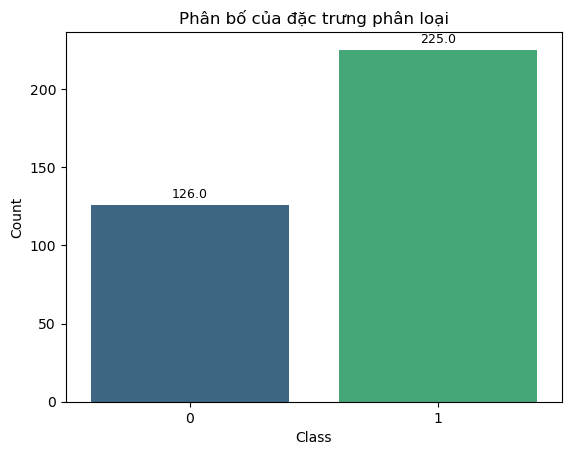

In [29]:

sns.countplot(x='class', data=df, palette='viridis')

# Thêm tiêu đề và nhãn
plt.title('Phân bố của đặc trưng phân loại')
plt.xlabel('Class')
plt.ylabel('Count')

# Hiển thị số lượng trên đầu mỗi cột
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='baseline', fontsize= 9, color='black', xytext=(0, 5), 
                       textcoords='offset points')

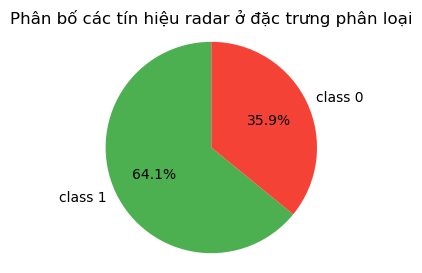

In [30]:
class_counts = df['class'].value_counts()

# Tạo biểu đồ hình tròn
plt.figure(figsize=(3,3))
plt.pie(class_counts, labels=['class 1', 'class 0'],
        autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])

plt.axis('equal')  # Đảm bảo biểu đồ là hình tròn
plt.title('Phân bố các tín hiệu radar ở đặc trưng phân loại')
# Hiển thị biểu đồ
plt.show()

##### Nhận xét: dữ liệu bị mất cân bằng 

##### Box plots

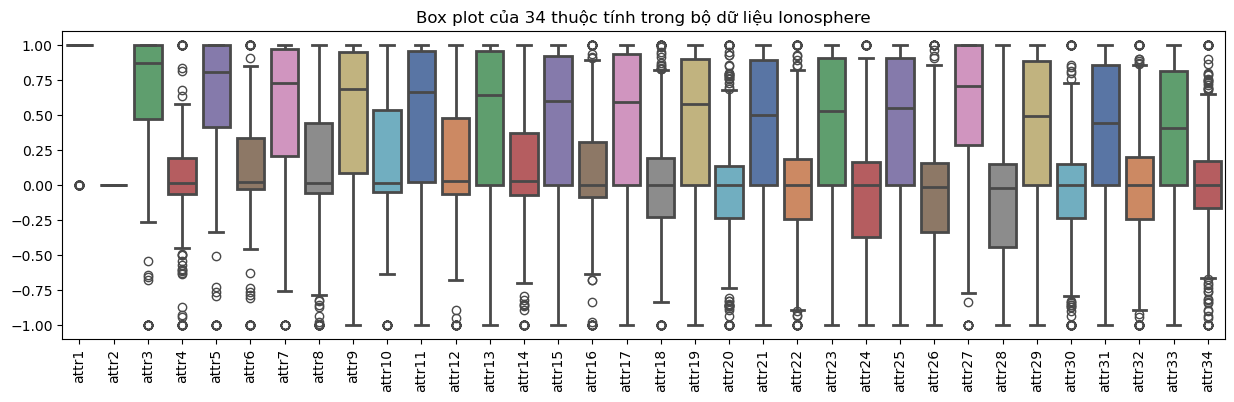

In [31]:
data_attributes = df.iloc[:, :-1]
plt.figure(figsize=(15, 4))  # Điều chỉnh kích thước biểu đồ cho phù hợp
sns.boxplot(data=data_attributes,  palette="deep", linewidth=2, whis=1.5)

# Bước 5: Đặt nhãn cho biểu đồ
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc
plt.title("Box plot của 34 thuộc tính trong bộ dữ liệu Ionosphere")

# Bước 6: Hiển thị biểu đồ
plt.show()

##### Nhận xét
- Nhiều đặc trưng có giá trị ngoại lai (trừ attr9, attr11, attr13, attr15, attr15, attr19, attr21, attr23, attr25, attr28, attr29, attr31, attr33)
- Các đặc trưng có chỉ số chẵn có giá trị ngoại lai nhiều hơn.
- Các đặc trưng có giá trị ngoại lai nhiều nhất: attr4, attr18, attr20, attr34.

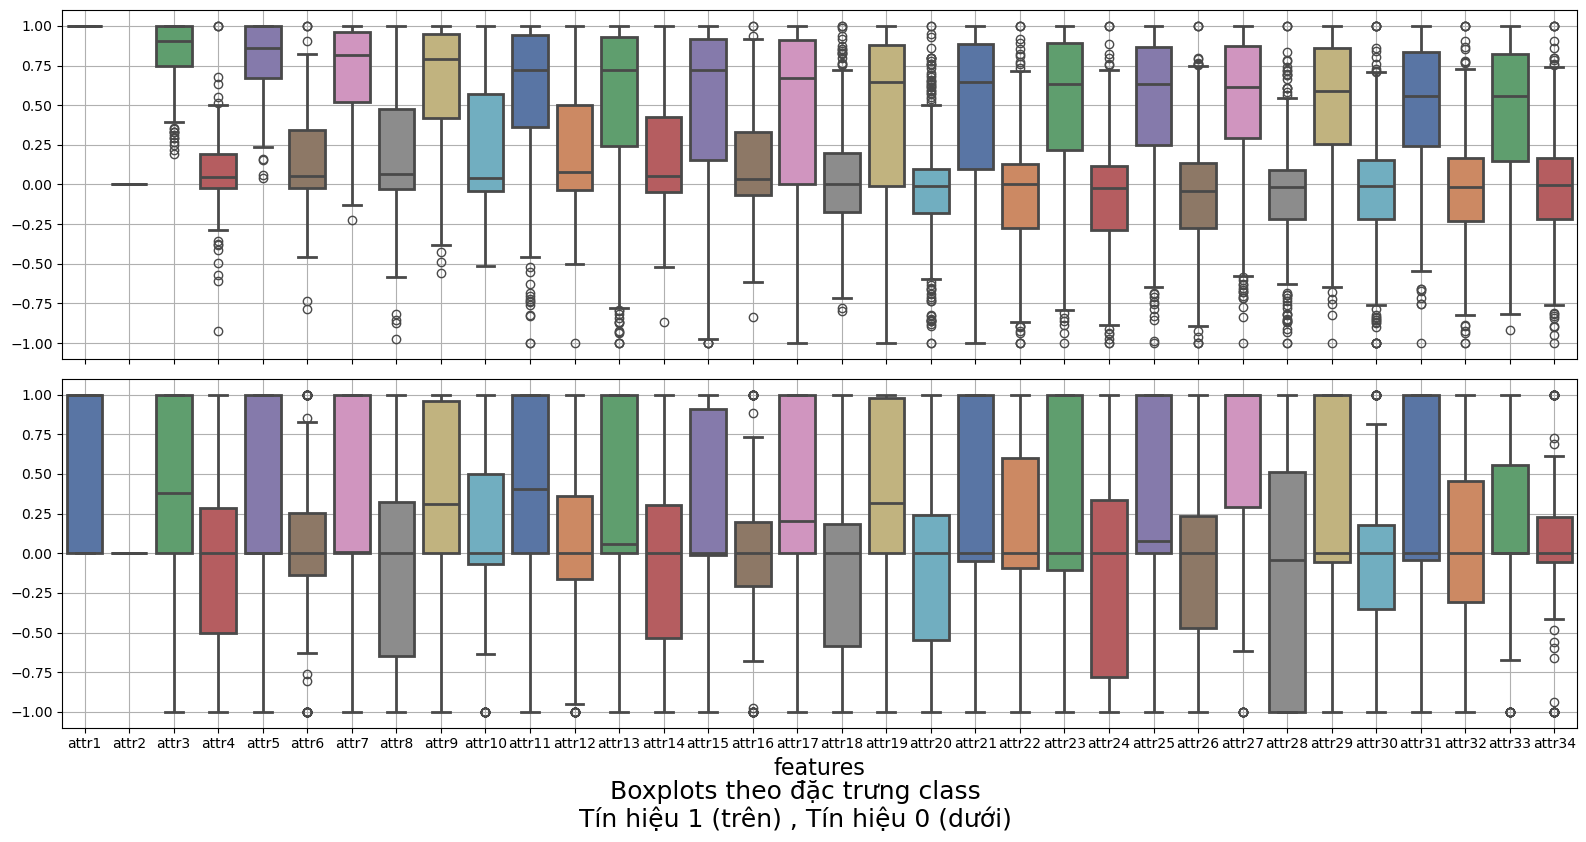

In [32]:
fig, axs = plt.subplots(2,1,figsize = (16,8), sharex= True)
data_attributes = df.iloc[:, :-1]
sns.boxplot(data =data_attributes[df['class']==1], palette="deep", linewidth=2, ax = axs[0], whis= 1.5)
sns.boxplot(data = data_attributes[df['class'] == 0], palette="deep", linewidth=2, ax = axs[1], whis= 1.5)
plt.figtext(0.5,-0.04, " Boxplots theo đặc trưng class \n\
Tín hiệu 1 (trên) , Tín hiệu 0 (dưới)", fontsize = 18, ha = 'center')
plt.xlabel("features", size = 16)
for ax in axs:
    ax.grid()
plt.tight_layout()
plt.show()

##### Nhận xét
- Với attr1, tín hiệu 0 (tín hiệu xấu) có thể nhận giá trị trong khoảng [0.1], tín hiệu 1 (tín hiệu tốt) chỉ có giá trị 1.
- Tín hiệu radar tốt có dữ liệu ngoại lai nhiều hơn tín hiệu radar xấu.
 

##### Biểu đồ Histogram

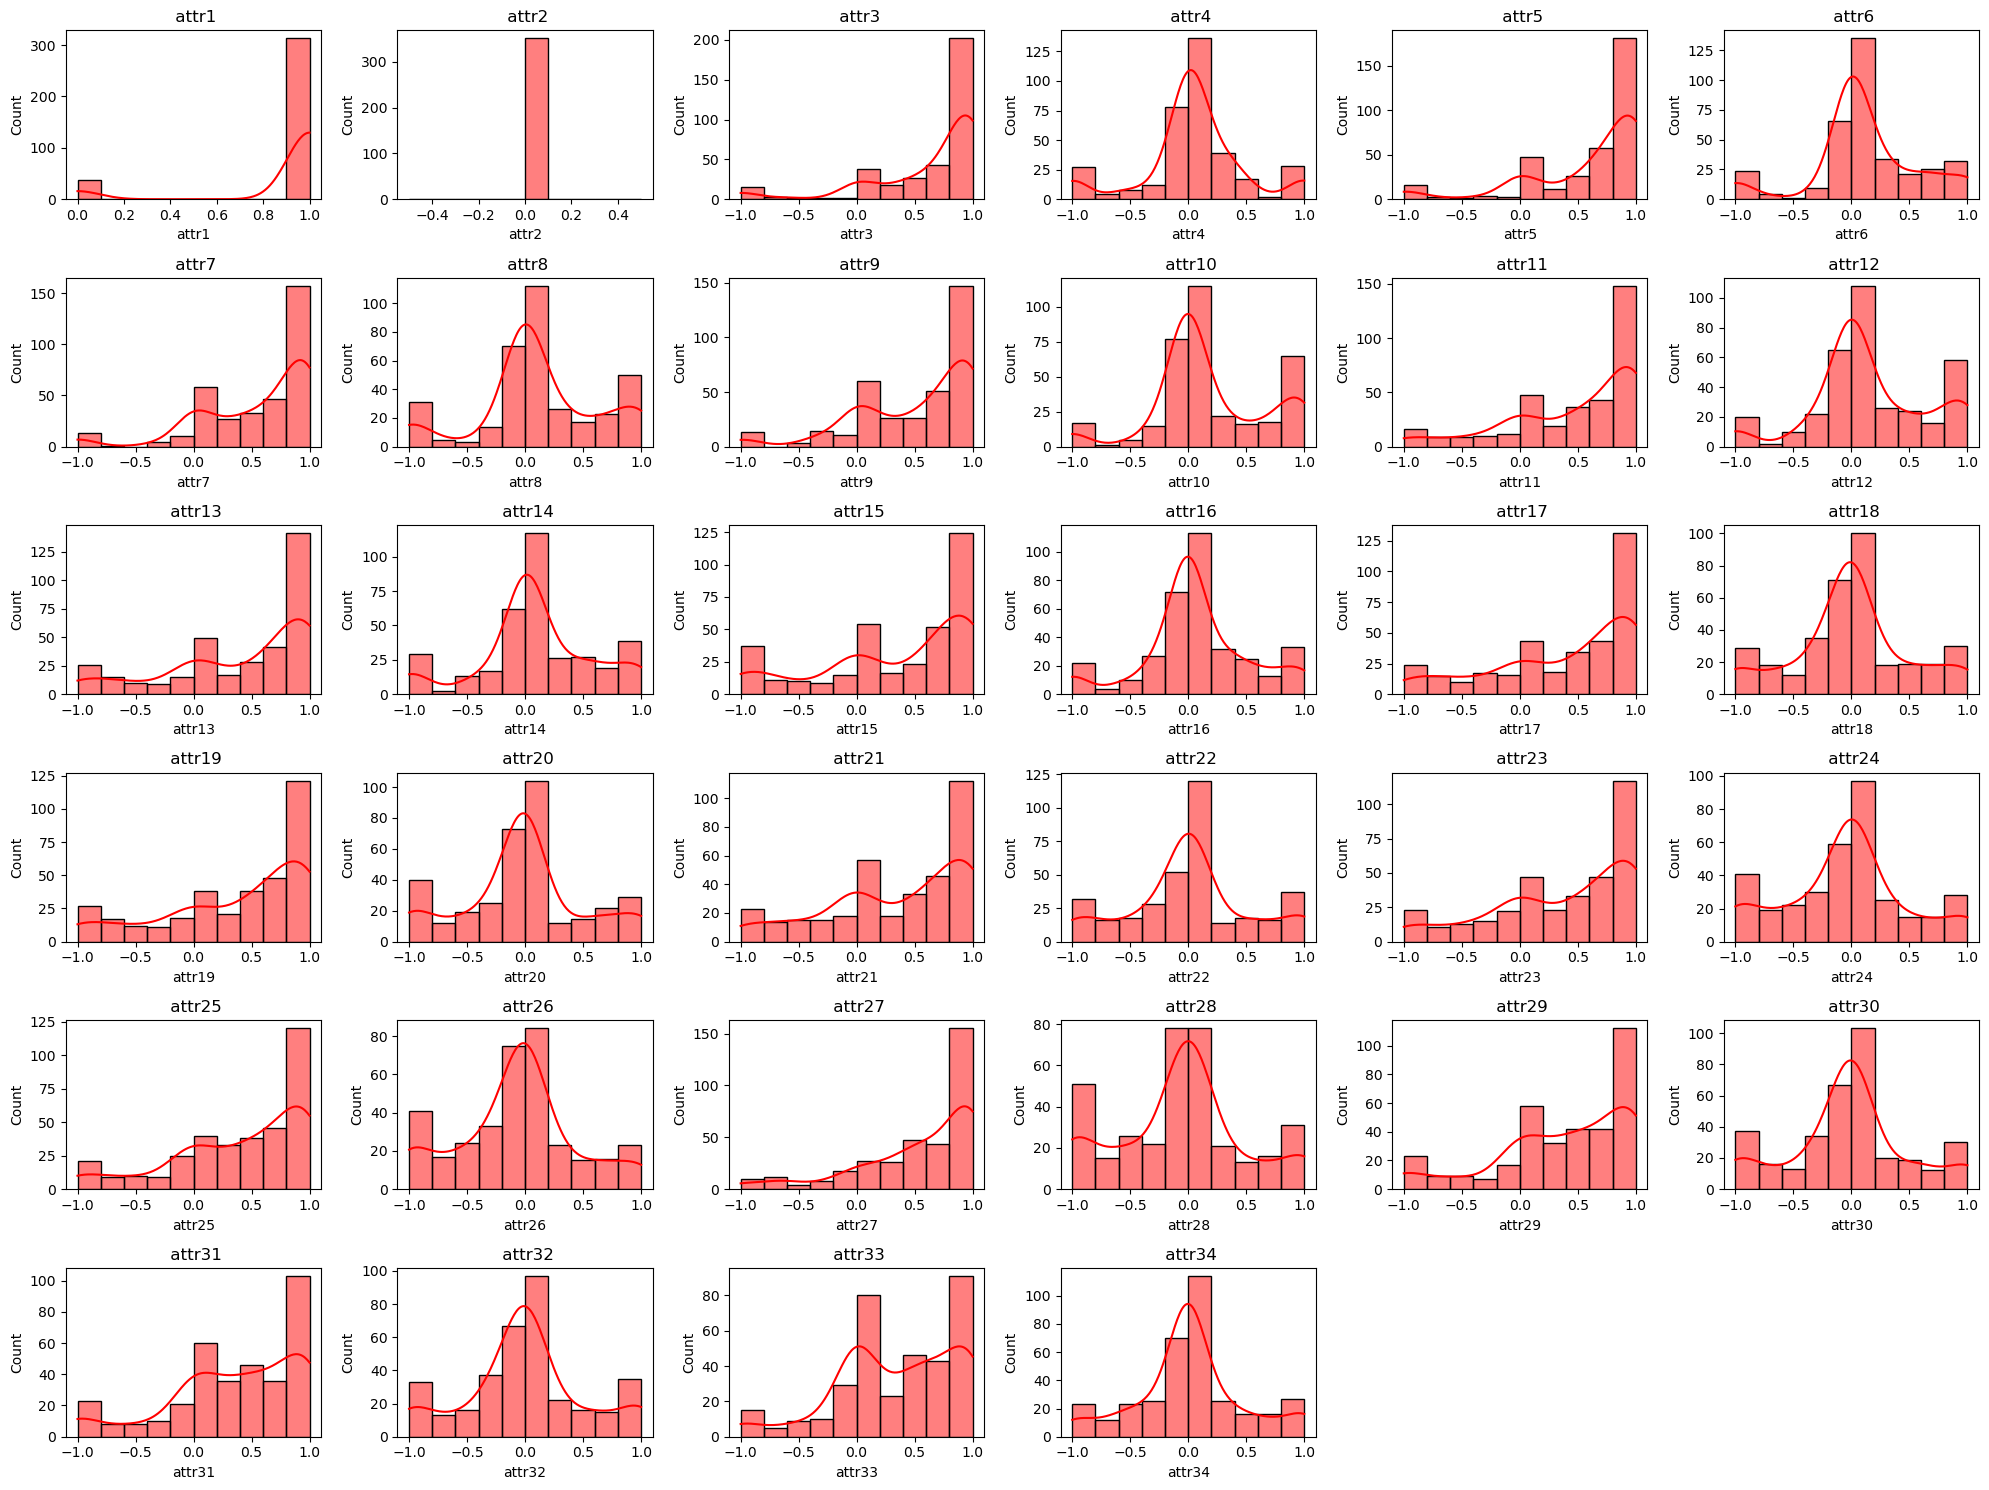

In [33]:
features = df.columns[df.columns != 'class'].tolist()
# Tạo hình để vẽ mỗi thuộc tính
num_features = len(features)
cols = 6  # Số cột
rows = (num_features + cols - 1) // cols  # Tính số hàng cần thiết

#plt.figure(figsize=(16, 5 * rows))  # Thay đổi chiều cao của hình theo số hàng
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[feature], kde=True, bins=10, color='red')
    plt.title(f' {feature}')

plt.tight_layout()
plt.show()

##### Nhận xét
- attr1 phần lớn mang giá trị 1, giá trị 0 không đáng kể
- attr2 toàn bộ mang giá trị 0, không có ý nghĩa đối với bài toán và có thể loại bỏ.
- Các đặc trưng từ 3-34: 
    - Các đặc trưng lẻ (phần thực): có xu hướng phân bố lệch phải
    - Các đặc trưng chẵn (phần ảo): phân bố có đỉnh nằm ở trung tâm

##### Correlation heatmap

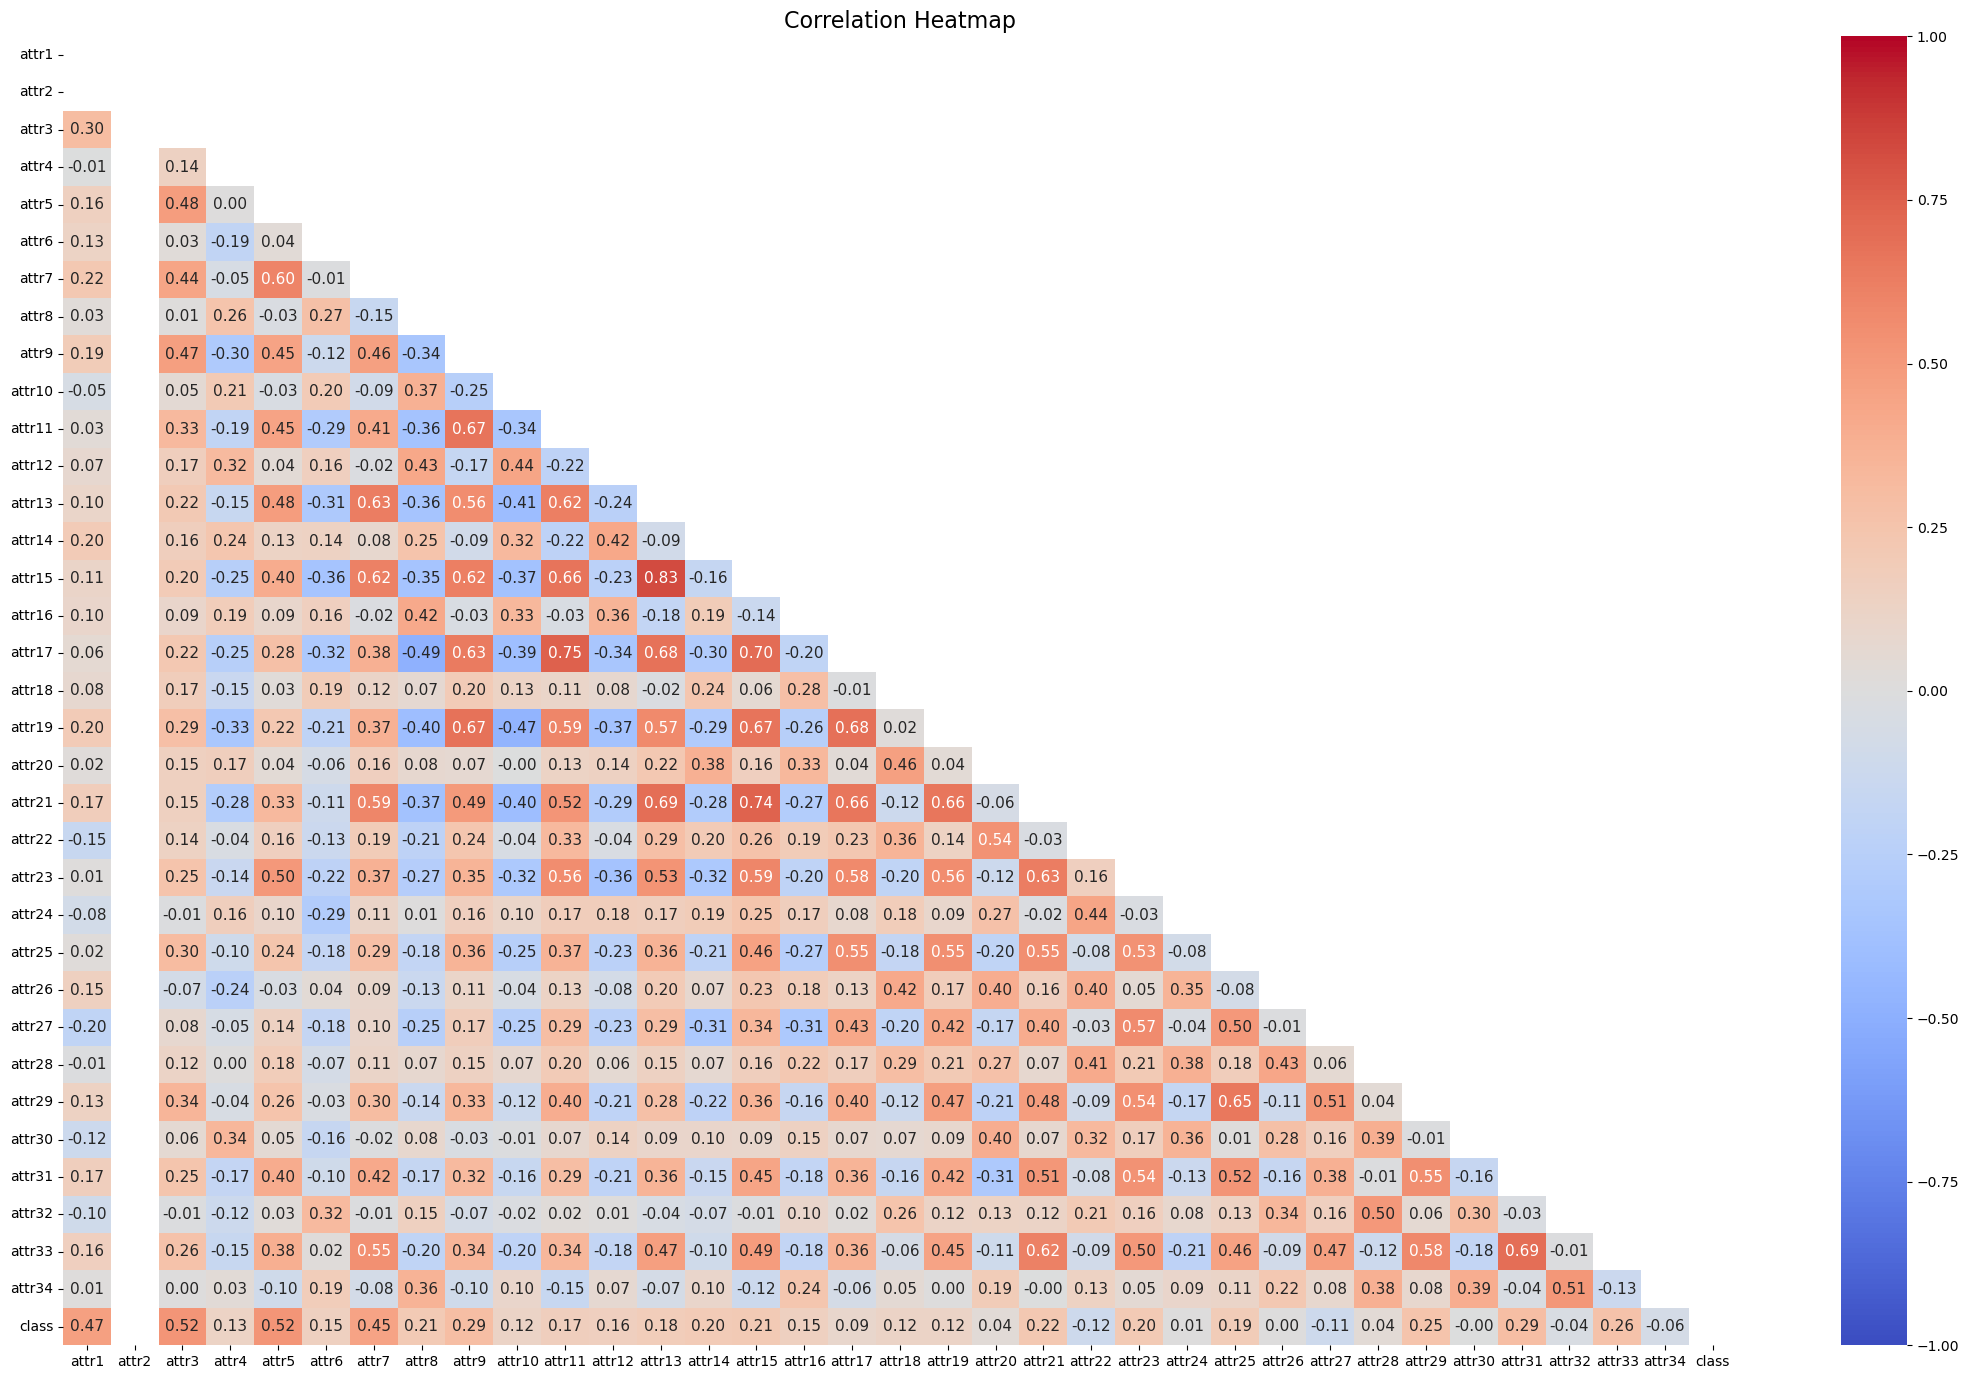

In [36]:
plt.figure(figsize=(27, 17))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask,vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 11})  # Điều chỉnh cỡ chữ annot
plt.title('Correlation Heatmap', fontsize=16)  # Tạo tiêu đề với cỡ chữ lớn hơn
plt.show()

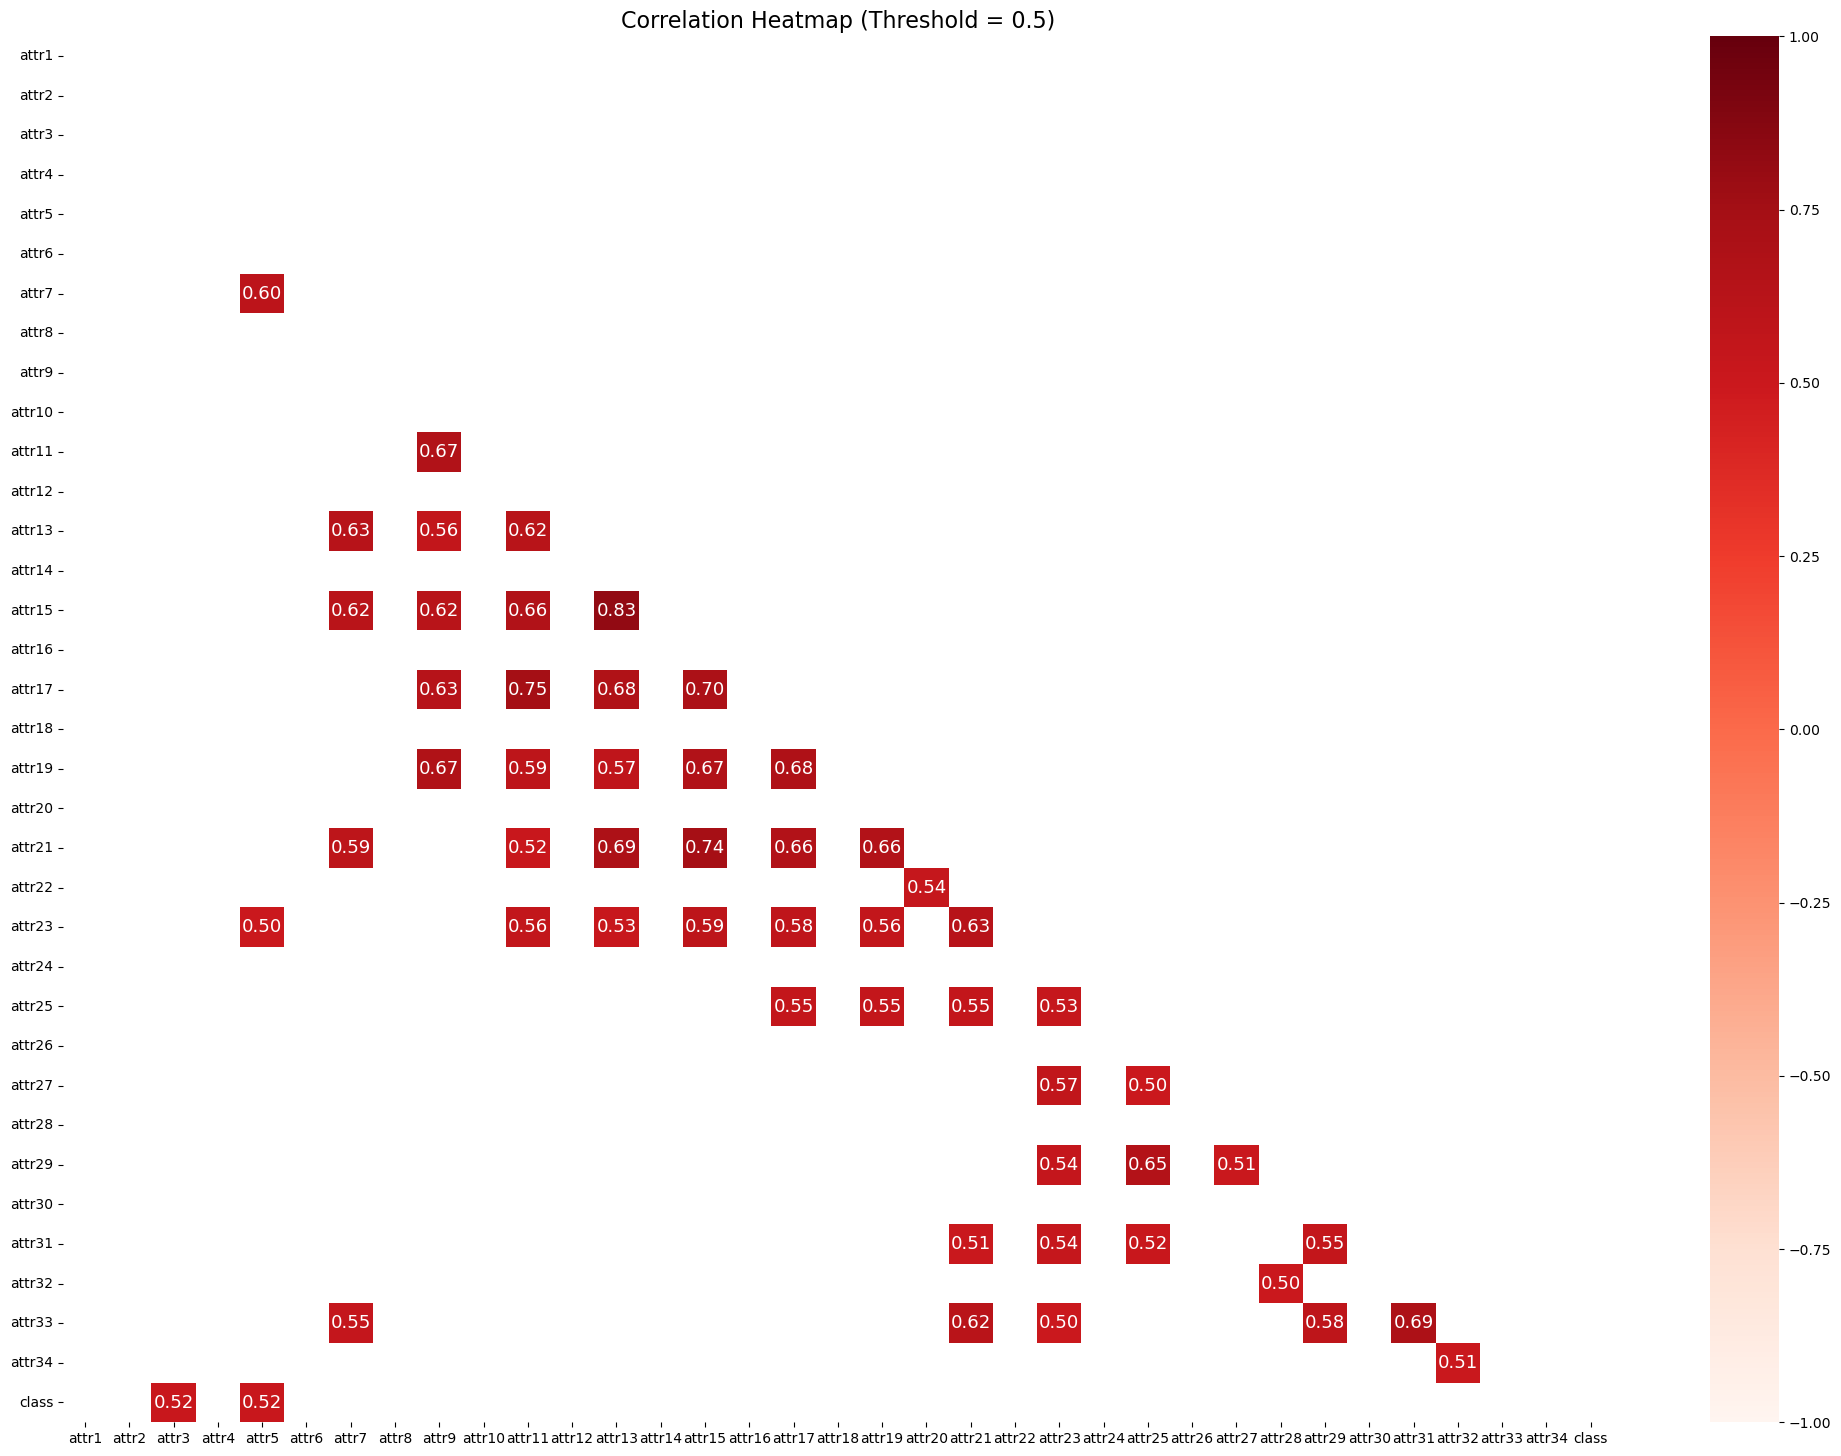

In [37]:
# Đặt ngưỡng tương quan
threshold = 0.5

# Tính ma trận tương quan
corr_matrix = df.corr()

# Áp dụng ngưỡng để lọc ra các giá trị tương quan thấp
filtered_corr = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]

# Tạo mặt nạ để ẩn tam giác dưới và đường chéo (tùy chọn)
mask = np.triu(np.ones_like(filtered_corr, dtype=bool))

# Vẽ biểu đồ heatmap với các giá trị tương quan đã được lọc
plt.figure(figsize=(25,18))
sns.heatmap(filtered_corr, annot=True, mask=mask, cmap="Reds", fmt=".2f", annot_kws={"size": 13}, vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Threshold = 0.5)', fontsize=16)
plt.show()

##### Nhận xét
- Có nhiều cặp đặc trưng có mối tương quan cao
- Các cặp đặc trưng có mối tương quan cao nhất:
   * attr13-attr15 ~ 0.826
   * attr11-attr17 ~ 0.748
   * attr15, attr21 ~ 0.741
   Các đặc trưng attr1, attr3, attr5, attr7 có tương quan cao với biến mục tiêu, trong khi mối quan hệ các đặc trưng attr20, attr24, attr26, attr28, attr30, attr32, attr34 với biến mục tiêu gần như bằng 0.

##### Kết luận
- Các đặc trưng có giá trị nằm trong khoảng [-1,1]
- Dữ liệu không có giá trị bị thiếu, chỉ có 1 dòng dữ liệu bị trùng lặp
- Nhiều đặc trưng có giá trị ngoại lai, đặc biệt là ở các đặc trưng có chỉ số chẵn
- Dữ liệu mất cân bằng, lớp 1 chiếm đa số với 64,1%
- Các đặc trưng có tương quan cao với biến mục tiêu: attr1, attr3, attr5, attr7